In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import os 
import pickle
from collections import Counter
from pathlib import Path
import csv
import multiprocessing as mp
import re
import ast

In [3]:
aging_dir = Path('/home/ubuntu/a/aging')
mfest = pd.read_pickle('fcs_metadata.pkl')
mfest

,Subject Accession,Species,Race,Race Specify,Ethnicity,Strain,Gender,Age Event,Age Event Specify,Subject Age,...,File Info ID,File Detail,File Name,Original File Name,fcs,pkl,pkl_exists,n_rows,n_columns,markers
0,SUB137160,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,44,...,573505,CyTOF result,RC4 11-0005_cells_found.573505.fcs,RC4 11-0005_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,150607.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
2,SUB137169,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,41,...,573507,CyTOF result,Mm 041513-RC4-11-0015_cells_found.573507.fcs,Mm 041513-RC4-11-0015_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,317311.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
4,SUB137172,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,45,...,573509,CyTOF result,RC4-11-0018_cells_found.573509.fcs,RC4-11-0018_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,222633.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
6,SUB137174,Homo sapiens,Black or African American,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,53,...,573511,CyTOF result,11-0020_cells_found.573511.fcs,11-0020_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,244654.0,28.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
8,SUB137182,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Male,Age at enrollment,NaN,71,...,573513,CyTOF result,053012-MeenaRC4 11-0029_cells_found.573513.fcs,053012-MeenaRC4 11-0029_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,412433.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573807,CyTOF result,2318--RC4 1213 control_cells_found.573807.fcs,2318--RC4 1213 control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,200180.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
549,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573808,CyTOF result,RC4 1213controlB_cells_found.573808.fcs,RC4 1213controlB_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,100833.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
551,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573809,CyTOF result,RC4-1213-1control_cells_found.573809.fcs,RC4-1213-1control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,264809.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."
553,SUB147387,Homo sapiens,Not Specified,NaN,Not Specified,NaN,Not Specified,Not Specified,NaN,99,...,573810,CyTOF result,RC41213 control_cells_found.573810.fcs,RC41213 control_cells_found.fcs,/home/ubuntu/a/aging/data/ResultFiles/CyTOF_re...,/home/ubuntu/a/aging/data/ResultFiles/cytof-pi...,True,143618.0,27.0,"[CELL_LENGTH, DEAD, CD19, CD4, CD8, IGD, CD85J..."


In [4]:
mfest.columns

Index(['Subject Accession', 'Species', 'Race', 'Race Specify', 'Ethnicity',
       'Strain', 'Gender', 'Age Event', 'Age Event Specify', 'Subject Age',
       'Age Unit', 'Subject Phenotype', 'ARM Accession', 'ARM Name',
       'Study Accession', 'Study Brief Title', 'Biosample Accession',
       'Biosample Description', 'Biosample Name', 'Biosample Type',
       'Biosample Subtype', 'Study Time Collected',
       'Study Time Collected Unit', 'Study Time T0 Event',
       'Study Time T0 Event Specify', 'Biosample Treatment',
       'Planned Visit Accession', 'Planned Visit Name', 'Experiment Accession',
       'Expsample Accession', 'Expsample Description',
       'Expsample Result Schema', 'Expsample Treatement', 'Reagent Accession',
       'Reagent Name', 'Reagent Reporter Name', 'File Info ID', 'File Detail',
       'File Name', 'Original File Name', 'fcs', 'pkl', 'pkl_exists', 'n_rows',
       'n_columns', 'markers'],
      dtype='object')

In [5]:
def arcsinh(x):
    return(np.arcsinh(x/5))

In [6]:
marker_counts = Counter()
for markers in mfest['markers']:
    marker_counts.update(markers)
marker_counts

Counter({'CELL_LENGTH': 284,
         'DEAD': 284,
         'CD19': 284,
         'CD4': 284,
         'CD8': 284,
         'IGD': 284,
         'CD85J': 284,
         'CD16': 284,
         'CD3': 284,
         'CD38': 284,
         'CD27': 284,
         'CD14': 284,
         'CD94': 284,
         'CCR7': 284,
         'CD45RA': 284,
         'CD20': 284,
         'CD127': 284,
         'CD33': 284,
         'CD28': 284,
         'CD24': 284,
         'CD161': 284,
         'TCRGD': 284,
         'CD56': 284,
         'HLADR': 284,
         'CD25': 284,
         'DNA1': 284,
         'DNA2': 284,
         '(BA138)DD': 51,
         'CXCR3': 1,
         'PD-1': 1})

In [7]:
markers = []
max_count = max(marker_counts.values())
for marker, count in marker_counts.items():
    if count == max_count:
        markers.append(marker)
markers

['CELL_LENGTH',
 'DEAD',
 'CD19',
 'CD4',
 'CD8',
 'IGD',
 'CD85J',
 'CD16',
 'CD3',
 'CD38',
 'CD27',
 'CD14',
 'CD94',
 'CCR7',
 'CD45RA',
 'CD20',
 'CD127',
 'CD33',
 'CD28',
 'CD24',
 'CD161',
 'TCRGD',
 'CD56',
 'HLADR',
 'CD25',
 'DNA1',
 'DNA2']

In [8]:
def filter_by_markers(df, q_markers):
    q_markers = set(q_markers)
    return df[df.apply(
        lambda row: len(q_markers & set(row['markers'])) == len(q_markers),
    axis=1
    )]   
samples = filter_by_markers(mfest, markers)
samples.shape

(284, 46)

count       284.000000
mean     247320.732394
std       86335.894452
min       48542.000000
25%      194455.500000
50%      247200.500000
75%      299832.000000
max      647463.000000
Name: n_rows, dtype: float64


<AxesSubplot:ylabel='Frequency'>

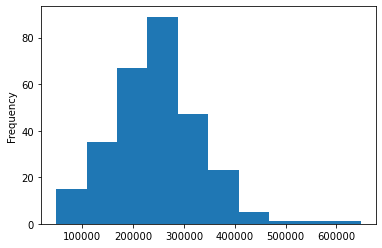

In [9]:
print(samples.n_rows.describe())
samples.n_rows.plot.hist()

In [10]:
row_cutoff = int(45e3)
print(row_cutoff)
samples = samples[samples.n_rows>row_cutoff]
samples.shape

45000


(284, 46)

In [11]:
samples['Age Unit'].value_counts()

Years            260
Not Specified     24
Name: Age Unit, dtype: int64

In [12]:
samples = samples[samples['Age Unit']!='Not Specified']

count    260.000000
mean      68.303846
std       15.169696
min       41.000000
25%       55.000000
50%       69.000000
75%       82.000000
max       90.000000
Name: Subject Age, dtype: float64


<AxesSubplot:ylabel='Frequency'>

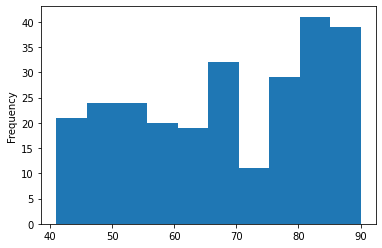

In [13]:
print(samples['Subject Age'].describe())
samples['Subject Age'].plot.hist()

In [14]:
samples = samples.reset_index()

In [15]:
pd.read_pickle(samples.iloc[0].pkl)

,CELL_LENGTH,DEAD,CD19,CD4,CD8,IGD,CD85J,CD16,CD3,CD38,...,CD33,CD28,CD24,CD161,TCRGD,CD56,HLADR,CD25,DNA1,DNA2
1,26.0,-0.534810,-0.883897,1.706276,-0.389549,1.095162,49.757641,12.978461,16.902872,4687.463379,...,-0.372071,-0.027616,-0.383645,-0.906472,-0.242294,-0.225837,-0.867546,-0.280114,202.016907,431.376648
2,37.0,-0.501825,-0.987176,60.403698,-0.105791,7.882118,-0.244238,-0.173425,249.101242,38.992962,...,11.001021,-0.182922,-0.707323,-0.652739,-0.600262,-0.914205,4.501838,-0.919009,113.373032,198.430557
3,20.0,-0.937247,-0.723077,65.363335,-0.308973,1.983649,1.986390,1.593549,148.718506,67.259468,...,1.809853,3.281014,-0.941640,-0.512368,9.840481,-0.139726,-0.828036,-0.629730,162.773148,482.315369
4,22.0,-0.572791,0.669641,60.976925,3.412380,1.510986,-0.677291,0.521174,37.451569,-0.306992,...,-0.503387,19.955927,-0.111736,2.431672,-0.597246,-0.695127,-0.014068,1.166284,308.275940,470.220825
5,32.0,0.022631,-0.114596,4.590069,1.202479,0.104959,152.993073,0.917886,-0.331726,12.559181,...,142.294800,2.811678,-0.504452,-0.492080,-0.046891,1.905674,5069.940918,39.427078,168.363663,371.216034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150603,33.0,25.963648,-0.736181,-0.811943,-0.430332,-0.358188,-0.758848,0.899444,9.686301,1.237110,...,-0.356411,-0.372350,8.002898,16.131897,-0.624776,-0.286313,-0.912130,-0.679784,268.397095,434.451538
150604,25.0,-0.023051,-0.157124,78.861618,11.280008,-0.081290,-0.991805,1.676905,245.862762,463.958405,...,3.164071,14.314236,2.366328,-0.564090,-0.368061,-0.740030,-0.840149,9.426412,162.650085,315.773132
150605,10.0,15.969790,-0.945064,-0.684829,-0.750039,-0.824051,-0.132160,-0.827413,-0.809735,-0.735797,...,-0.872124,-0.455257,-0.695967,-0.560733,-0.335767,-0.446366,-0.279087,-0.120687,75.549614,63.773636
150606,41.0,-0.046112,0.961171,-0.180391,69.716980,-0.316974,-0.564795,-0.370083,123.145561,17.038406,...,0.185062,14.354417,-0.328775,184.206970,6.678673,-0.850368,-0.076979,-0.556896,203.132095,406.615112


In [16]:
def read_frame(pkl):
    df = pd.read_pickle(pkl)
    df = df[markers]
    df = df.iloc[:int(row_cutoff),:]
    df = df.apply(arcsinh)
    new_shape = list(df.shape)+[1]
    d = df.values
    d = d.reshape(new_shape)
    print(pkl.name)
    return d

In [17]:
pool = mp.Pool()

022813-Meena-RC4-11-0168-1_cells_found.573574.pkl
RC4 11-0005_cells_found.573505.pkl
RC4 11-0150_cells_found.573563.pkl
022113-Meena-RC4-11-0127_cells_found.573552.pkl
031513RC4 11-0170_cells_found.573575.pkl
022813-Meena-RC4-11-0184_cells_found.573584.pkl
053012-MeenaRC4 11-0104_cells_found.573542.pkl
053012-MeenaRC4 11-0077_cells_found.573532.pkl
11-0055_cells_found.573519.pkl
Mm 041513-RC4-11-0015_cells_found.573507.pkl
RC4 11-0151_cells_found.573564.pkl
022113-Meena-RC4-11-0130-1_cells_found.573553.pkl
RC4-11-0171_cells_found.573576.pkl
022813-Meena-RC4-11-0185_cells_found.573585.pkl11-0078_cells_found.573533.pkl

11-0057_cells_found.573520.pkl
032113MeenaRC4 11-0135_cells_found.573554.pkl
11-0111_cells_found.573543.pkl
022113-Meena-RC4-11-0156_cells_found.573566.pkl
RC4-11-0018_cells_found.573509.pkl
RC4 11-0187_cells_found.573586.pkl
032014-RC4 11-0176_cells_found.573577.pkl
11-0080_cells_found.573534.pkl
022113-Meena-RC4-11-0157_cells_found.573567.pkl
022113-Meena-RC4-11-0136c_c

In [18]:
expr_list = pool.map(read_frame, samples.pkl)
expr_list = np.stack(expr_list)
print("The dimenstion of the data is: ", expr_list.shape)

The dimenstion of the data is:  (260, 45000, 27, 1)


In [19]:
pool.close()
pool.terminate()

In [20]:
#Use extra data files to get clinical info to add to samples
#First build a lookup that can identify the subject for the blood samples bio specimen id
f = open(aging_dir/'biosample.txt')
bio_lookup = {}
first = True
for l in f.readlines():
    if first:
        first = False
        continue
    vals = l.strip().split("\t")
    bio_lookup[vals[0]] = vals[9]
f.close()

test_rslt = {}
for val in bio_lookup.values():
    test_rslt[val] = {}

#Get all the test results and build a dictionary of test values for each subject    
f = open(aging_dir/'lab_test.txt')
for l in f.readlines():
    vals = l.strip().split("\t")
    biosample = vals[2]
    if biosample not in bio_lookup:
        continue
    subject = bio_lookup[biosample]
    test = vals[4].replace(" ", "").replace(",","").replace("%", "_Pct").replace("/","_").replace("Serum_Plasma","")
    v = vals[9].replace(" ","").replace("<","").replace("mg/dl", "").replace("mm/hr", "").replace("uL","")
    try:
        v_float = float(v)
    except:
        continue
    if subject in test_rslt and 'Abs' not in test:
        test_rslt[subject][test] = v_float
f.close()

tr = pd.DataFrame(test_rslt)
tr = tr.transpose(copy=True)

tr

,WBC,RBC,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,NEUT_Pct,LYM_Pct,...,ProteinTotal,AlbuminTotal,TotalBilirubin,AlkalinePhosphataseTotal,AST(SGOT),ALT(SGPT),Globulin,C-ReactiveProtein,PlateletCount,ESR
SUB137231,6.8,4.60,14.9,43.3,94.1,32.5,34.5,14.6,57.1,24.3,...,8.2,4.7,0.6,105.0,27.0,36.0,3.5,0.2,NaN,NaN
SUB137295,4.6,4.25,13.9,40.9,96.1,32.6,33.9,13.8,64.4,21.5,...,6.9,3.5,0.6,116.0,28.0,26.0,3.4,1.2,175.0,NaN
SUB137331,6.4,4.62,15.2,44.6,96.5,32.9,34.1,13.1,72.5,19.6,...,7.2,3.6,0.7,139.0,18.0,24.0,3.6,0.7,248.0,NaN
SUB137174,5.9,4.57,13.0,39.9,87.4,28.4,32.5,16.4,61.4,26.7,...,7.6,3.5,NaN,93.0,19.0,27.0,4.1,3.5,253.0,NaN
SUB137398,7.3,4.57,14.1,42.1,92.1,30.8,33.5,13.7,57.5,33.8,...,7.5,4.0,0.9,96.0,29.0,34.0,3.5,0.7,130.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUB137611,5.0,4.20,12.4,37.5,89.3,29.6,33.1,13.7,60.3,28.5,...,7.1,3.5,NaN,80.0,17.0,35.0,3.6,0.2,267.0,NaN
SUB137612,3.1,4.18,12.7,38.8,92.9,30.5,32.8,14.5,42.0,48.7,...,7.5,4.0,0.6,40.0,21.0,35.0,3.5,0.2,201.0,NaN
SUB137614,9.2,4.04,12.4,36.8,91.1,30.7,33.7,13.3,69.9,24.1,...,7.4,4.1,0.5,66.0,53.0,31.0,3.3,0.2,232.0,NaN
SUB137616,3.6,3.98,12.4,38.0,95.6,31.1,32.5,15.0,54.9,27.0,...,6.8,3.8,NaN,60.0,16.0,32.0,3.0,0.2,178.0,NaN


In [25]:
samples = samples.set_index('Subject Accession', drop=False).join(tr).copy()
samples.reset_index(drop=True, inplace=True)
samples.drop(columns='index', inplace=True)
samples

,Subject Accession,Species,Race,Race Specify,Ethnicity,Strain,Gender,Age Event,Age Event Specify,Subject Age,...,ProteinTotal,AlbuminTotal,TotalBilirubin,AlkalinePhosphataseTotal,AST(SGOT),ALT(SGPT),Globulin,C-ReactiveProtein,PlateletCount,ESR
0,SUB137160,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SUB137169,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SUB137172,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SUB137174,Homo sapiens,Black or African American,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,53,...,7.6,3.5,NaN,93.0,19.0,27.0,4.1,3.5,253.0,NaN
4,SUB137182,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Male,Age at enrollment,NaN,71,...,7.6,4.3,0.6,92.0,23.0,30.0,3.3,0.2,206.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,SUB137890,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Male,Age at enrollment,NaN,90,...,7.5,3.8,1.1,162.0,30.0,42.0,3.7,0.4,194.0,NaN
256,SUB137891,Homo sapiens,White,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,84,...,7.9,3.8,0.5,85.0,20.0,31.0,4.1,0.2,207.0,NaN
257,SUB138230,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,90,...,7.7,3.8,NaN,90.0,24.0,35.0,3.9,0.2,246.0,NaN
258,SUB138231,Homo sapiens,Asian,NaN,Not Hispanic or Latino,NaN,Female,Age at enrollment,NaN,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
samples.Glucose.isnull().sum()

58

In [27]:
allData = {
    'samples': samples,
    'expr_list': expr_list,
    'marker_names': pd.Series(markers)
}
out_path = aging_dir/'aging-cytof-data.obj'
with open(out_path,'wb') as wf:
    pickle.dump(allData, wf)

In [28]:
samples.iloc[0]

Subject Accession                 SUB137160
Species                        Homo sapiens
Race                                  Asian
Race Specify                            NaN
Ethnicity            Not Hispanic or Latino
                              ...          
ALT(SGPT)                               NaN
Globulin                                NaN
C-ReactiveProtein                       NaN
PlateletCount                           NaN
ESR                                     NaN
Name: 0, Length: 85, dtype: object